<a href="https://colab.research.google.com/github/urosgodnov/juypterNotebooks/blob/main/GDP_ANALYSIS_OF_COUNTRIES_OVER_TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GDP ANALYSIS OF COUNTRIES OVER TIME

## Installing and loading necessary packages

**it make take a few minutes**

In [ ]:
install.packages("eurostat")
install.packages("gtsummary")
install.packages("gt")
library(tidyverse)
library(eurostat)
library(gtsummary)
library(gt)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘e1071’, ‘classInt’, ‘RefManageR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data importing

This code snippet is importing an economic dataset ("nama_10_gdp") from Eurostat. It's designed to create a data frame (data_1) that contains both human-readable labels and corresponding codes for the variables in the dataset. This makes the data easier to understand and work with for further analysis.

In [ ]:
data_1<-get_eurostat("nama_10_gdp", type="label") |>
  dplyr::select(-c(TIME_PERIOD, values)) |>
  rename_with(~paste0(.x,"label"))|>
  bind_cols(get_eurostat("nama_10_gdp", type="code"))

Table nama_10_gdp cached at /tmp/Rtmpdj7JCg/eurostat/c9c1c17400cce42b213d1b7f8cbd98ff.rds

Table nama_10_gdp cached at /tmp/Rtmpdj7JCg/eurostat/035227cace09ab8cc63ff968ac766689.rds



In [ ]:
data_2<-get_eurostat("nama_10_pc", type="label") |>
  dplyr::select(-c(TIME_PERIOD, values)) |>
  rename_with(~paste0(.x,"label"))|>
  bind_cols(get_eurostat("nama_10_pc", type="code"))

Table nama_10_pc cached at /tmp/Rtmpdj7JCg/eurostat/0071827a826df4c48c0fdb57fab92cad.rds

Table nama_10_pc cached at /tmp/Rtmpdj7JCg/eurostat/c37df56816f6d1078d0559519bf63a3f.rds



showing first 6 rows of a dataframe. We use the command head(dataset). By default it displays 6 rows, but we can overwrite this by passing the number of rows, e.g. 10 rows: head(dataset, 10)

In [ ]:
head(data_1)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1995-01-01,176594.2
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1996-01-01,179695.4
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1997-01-01,183613.0
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1998-01-01,190554.0
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1999-01-01,197178.1
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,2000-01-01,204320.5


In [ ]:
head(data_2)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1995-01-01,1310
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1996-01-01,1410
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1997-01-01,1270
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1998-01-01,1390
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1999-01-01,1580
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,2000-01-01,1700


**showing the dataframe structure**

In [ ]:
str(data_1)

tibble [1,006,220 × 10] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:1006220] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:1006220] "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" ...
 $ na_itemlabel: chr [1:1006220] "Value added, gross" "Value added, gross" "Value added, gross" "Value added, gross" ...
 $ geolabel    : chr [1:1006220] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:1006220] "A" "A" "A" "A" ...
 $ unit        : chr [1:1006220] "CLV05_MEUR" "CLV05_MEUR" "CLV05_MEUR" "CLV05_MEUR" ...
 $ na_item     : chr [1:1006220] "B1G" "B1G" "B1G" "B1G" ...
 $ geo         : chr [1:1006220] "AT" "AT" "AT" "AT" ...
 $ TIME_PERIOD : Date[1:1006220], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:1006220] 176594 179695 183613 190554 197178 ...


In [ ]:
str(data_2)

tibble [129,003 × 10] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:129003] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:129003] "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" ...
 $ na_itemlabel: chr [1:129003] "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" ...
 $ geolabel    : chr [1:129003] "Albania" "Albania" "Albania" "Albania" ...
 $ freq        : chr [1:129003] "A" "A" "A" "A" ...
 $ unit        : chr [1:129003] "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" ...
 $ na_item     : chr [1:129003] "B1GQ" "B1GQ" "B1GQ" "B1GQ" ...
 $ geo         : chr [1:129003] "AL" "AL" "AL" "AL" ...
 $ TIME_PERIOD : Date[1:129003], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:129003]

## Data filtering and tidying

The code snippet takes original economic data (data_1), renames a column, adds a year column, and then filters the data to include only the rows related to the specific economic indicators defined in the codes vector. Finally, it displays the first few rows of this filtered data to give you a preview.

In [ ]:
codes <- c("CLV_I15", "PC_GDP", "CP_MEUR", "CLV10_MEUR", "CLV_PCH_PRE", "CON_PPCH_PRE", "PD15_EUR")
eu_countries <- c("AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR",
                  "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL",
                  "PL", "PT", "RO", "SK", "SI", "ES", "SE","EU27_2020")

data_1_filtered<-data_1 |>
  rename("time_period"="TIME_PERIOD")|>
  mutate(year=year(time_period)) |>
  dplyr::filter(unit %in% codes & geo %in% eu_countries)

head(data_1_filtered)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,time_period,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1995-01-01,192651.3,1995
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1996-01-01,196034.5,1996
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1997-01-01,200308.3,1997
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1998-01-01,207880.3,1998
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1999-01-01,215106.8,1999
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,2000-01-01,222898.6,2000


In [ ]:
str(data_1_filtered)

tibble [156,524 × 11] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:156524] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:156524] "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" ...
 $ na_itemlabel: chr [1:156524] "Value added, gross" "Value added, gross" "Value added, gross" "Value added, gross" ...
 $ geolabel    : chr [1:156524] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:156524] "A" "A" "A" "A" ...
 $ unit        : chr [1:156524] "CLV10_MEUR" "CLV10_MEUR" "CLV10_MEUR" "CLV10_MEUR" ...
 $ na_item     : chr [1:156524] "B1G" "B1G" "B1G" "B1G" ...
 $ geo         : chr [1:156524] "AT" "AT" "AT" "AT" ...
 $ time_period : Date[1:156524], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:156524] 192651 196034 200308 207880 215107 ...
 $ year        : num [1:156524] 1995 1996 1997 1998 1999 ...


This code snippet filters the economic data in data_2 to focus on:

- EU member states: specified by the eu_countries vector.
- Data from 2000 onwards: using the year >= 2000 condition.
- A particular unit of measurement: "PC_EU27_2020_HAB_MEUR_CP".

The result is a new dataframe, data_2_filtered, containing a subset of the original data, which is then displayed with head().

In [ ]:
eu_countries <- c("AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR",
                  "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL",
                  "PL", "PT", "RO", "SK", "SI", "ES", "SE","EU27_2020")

data_2_filtered<-data_2 |>
  rename("time_period"="TIME_PERIOD")|>
  mutate(year=year(time_period))|>
  dplyr::filter(geo %in% eu_countries & year>=2000 & unit %in% c("CLV10_EUR_HAB","PC_EU27_2020_HAB_MEUR_CP"))

head(data_2_filtered)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,time_period,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2000-01-01,31510,2000
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2001-01-01,31800,2001
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2002-01-01,32120,2002
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2003-01-01,32340,2003
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2004-01-01,32960,2004
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2005-01-01,33500,2005


In [ ]:
str(data_2_filtered)

tibble [11,664 × 11] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:11664] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:11664] "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" ...
 $ na_itemlabel: chr [1:11664] "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" ...
 $ geolabel    : chr [1:11664] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:11664] "A" "A" "A" "A" ...
 $ unit        : chr [1:11664] "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" ...
 $ na_item     : chr [1:11664] "B1GQ" "B1GQ" "B1GQ" "B1GQ" ...
 $ geo         : chr [1:11664] "AT" "AT" "AT" "AT" ...
 $ time_period : Date[1:11664], format: "2000-01-01" "2001-01-01" ...
 $ values      : num [1:11664] 31510 3180

## Analysis


### GDP

Analyze GDP data for the year 2023 or 2022.

Data presentation (graph):

- GDP as a whole
- GDP per capita

Data Filtering:

- gdp_whole <- data_1_filtered |> ...: Filters data_1_filtered to include only rows where year is 2022, unit is "CLV10_MEUR", and na_itemlabel is "Gross domestic product at market prices".
Selecting Columns:

- dplyr::select(geo, values): Selects only the geo and values columns from the filtered data, creating the gdp_whole dataset.

Table Creation with Formatting:

- gt(): Converts gdp_whole into a formatted table.
- fmt_currency(columns = values, currency = "EUR"): Formats the values column as currency in euros.
- cols_label(values = "in millions EUR"): Renames the values column to "in millions EUR" for display purposes.

#### GDP as a whole

In [ ]:
gdp_whole<-data_1_filtered |>
  dplyr::filter(year==2022) |>
  dplyr::filter(unit=="CLV10_MEUR") |>
  dplyr::filter(na_itemlabel=="Gross domestic product at market prices")

Creating a helper function (gts) to display gt object in Google colab ecosystem!

In [ ]:
gts <- function(gt_table){
   gt:::as.tags.gt_tbl(gt_table)
}


In [ ]:
gdp_whole|>
  dplyr::select(geo, values)|>
      gt()|>
        fmt_currency(
           columns = values,
          currency = "EUR" )|>
            cols_label(geo="Country",
                      values=" in millions EUR") |>
        gts()

Country,in millions EUR
AT,"€349,044.80"
BE,"€434,113.30"
BG,"€49,991.80"
CY,"€26,278.00"
CZ,"€201,146.30"
DE,"€3,074,843.40"
DK,"€304,744.00"
EE,"€21,477.70"
ES,"€1,207,453.50"
EU27_2020,"€13,146,883.20"


ggplot(gdp_whole, aes(x = reorder(geo, -values), y = values)):

- Creates a plot using the gdp_whole dataset.

aes(x = reorder(geo, -values), y = values):
- Sets geo (geographic region) on the x-axis and values (GDP) on the y-axis.

reorder(geo, -values):
- Reorders the geographic regions based on values in descending order (indicated by -values), so regions with higher GDP appear first on the x-axis.

geom_bar(stat = "identity", fill = "steelblue"):

- geom_bar(stat = "identity"): Plots a bar for each region with the actual GDP values (stat = "identity" means that the y-axis reflects the data values directly rather than counts).
- fill = "steelblue": Sets the color of the bars to "steelblue".

labs(...):

- Adds labels to the plot:
 - title = "GDP by Geographic Region in 2022": Sets the plot title.
 - x = "Geographic Region": Labels the x-axis as "Geographic Region".
 - y = "GDP in Millions EUR": Labels the y-axis as "GDP in Millions EUR".

theme_minimal():

- Applies a minimal theme, removing background grid lines and providing a cleaner, simpler look.

theme(axis.text.x = element_text(angle = 90, hjust = 1)):

- Customizes the x-axis text by rotating it 90 degrees (angle = 90), which helps prevent overlapping labels if there are many regions.
- hjust = 1: Aligns the rotated labels to the right.

scale_y_continuous(labels = scales::comma):

- Formats the y-axis labels to include commas for thousands, making the large numbers easier to read.

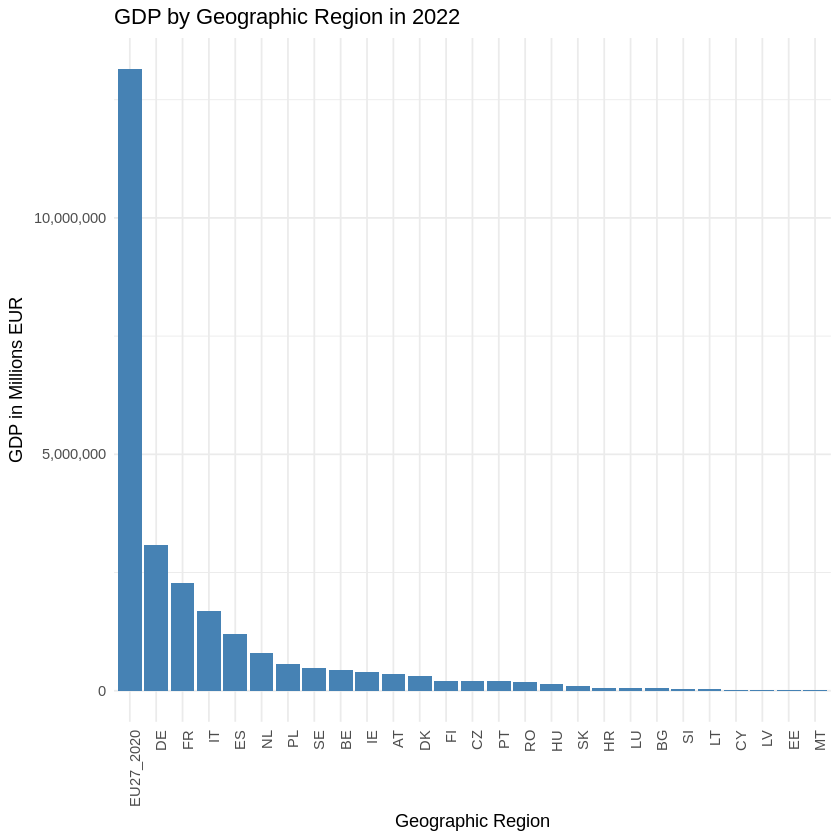

In [ ]:
ggplot(gdp_whole, aes(x = reorder(geo, -values), y = values)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "GDP by Geographic Region in 2022",
    x = "Geographic Region",
    y = "GDP in Millions EUR"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(labels = scales::comma)

#### GDP as a percentage

In [ ]:
gdp_per_capita<-data_2_filtered |>
  dplyr::filter(year==2022) |>
  dplyr::filter(unit=="CLV10_EUR_HAB") |>
  dplyr::filter(na_itemlabel=="Gross domestic product at market prices")

In [ ]:
gdp_per_capita|>
  dplyr::select(geo, values)|>
      gt()|>
        fmt_currency(
           columns = values,
          currency = "EUR" )|>
            cols_label(geo="Country",
                      values=" in EUR") |>
        gts()

Country,in EUR
AT,"€38,560.00"
BE,"€37,170.00"
BG,"€7,730.00"
CY,"€28,790.00"
CZ,"€18,690.00"
DE,"€36,690.00"
DK,"€51,600.00"
EE,"€16,130.00"
ES,"€25,270.00"
EU27_2020,"€29,300.00"


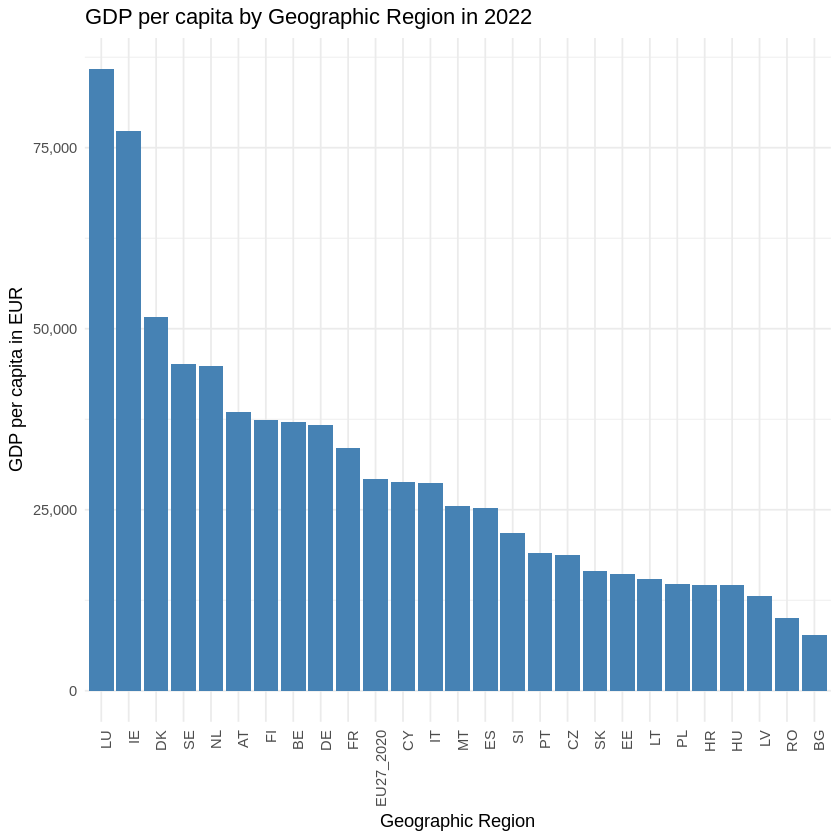

In [ ]:
ggplot(gdp_per_capita, aes(x = reorder(geo, -values), y = values)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "GDP per capita by Geographic Region in 2022",
    x = "Geographic Region",
    y = "GDP per capita in EUR"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(labels = scales::comma)

#### Analysis of the GDP ratio between 2023 and 2000

**we take the pc data**

gdp_per_capita_ratio <- data_2_filtered |>:

- creates a new object, gdp_per_capita_ratio, which will store the result of the transformations applied to data_2_filtered.

Filtering Data:

- dplyr::filter(year %in% c(2000, 2023)): Keeps only rows where year is either 2000 or 2023, focusing on data from those two years.

- dplyr::filter(unit == "CLV10_EUR_HAB"): Filters rows where the unit column is equal to "CLV10_EUR_HAB".

- dplyr::filter(na_itemlabel == "Gross domestic product at market prices"): Retains only rows where the na_itemlabel column equals "Gross domestic product at market prices," focusing on GDP data specifically.

Selecting Relevant Columns:

- dplyr::select(geo, year, values): Keeps only the geo (geographic region), year, and values (GDP per capita) columns, discarding any other columns.

Reshaping Data with pivot_wider:

- tidyr::pivot_wider(names_from = year, values_from = values): Converts the year values (2000 and 2023) into separate columns, using their corresponding values as the entries in those new columns.
- names_from = year: Specifies that unique values in the year column (2000 and 2023) should become column names.
- values_from = values: Indicates that the values column will provide the data for the newly created columns.

Calculating the Index:

- mutate(index = round(2023/2000 * 100, 2)): Adds a new column, index, which calculates the GDP per capita index between 2000 and 2023 for each geographic region.
- The calculation (2023/2000) * 100 finds the percentage change in GDP per capita from 2000 to 2023, expressed as an index.
- round(..., 2): Rounds the index to two decimal places for readability.

In [ ]:
gdp_per_capita_ratio<-data_2_filtered |>
  dplyr::filter(year %in% c(2000, 2023)) |>
  dplyr::filter(unit == "CLV10_EUR_HAB") |>
  dplyr::filter(na_itemlabel == "Gross domestic product at market prices") |>
  dplyr::select(geo, year, values) |>
  tidyr::pivot_wider(names_from = year, values_from = values)|>
  mutate(index=round(`2023`/`2000`*100,2))

In [ ]:
gdp_per_capita_ratio|>
  dplyr::select(geo, `2000`, `2023`, index)|>
      gt()|>
      fmt_currency(
          columns = c(`2000`, `2023`),
          currency = "EUR" )|>
        cols_label(geo="Country",
                  `2000`="per capita in 2000",
                  `2023`="per capita in 2023") |>

      gts()

Country,per capita in 2000,per capita in 2023,index
AT,"€31,510.00","€37,860.00",120.15
BE,"€29,910.00","€37,340.00",124.84
BG,"€2,990.00","€7,900.00",264.21
CY,"€20,130.00","€29,080.00",144.46
CZ,"€11,440.00","€18,480.00",161.54
DE,"€29,410.00","€36,290.00",123.39
DK,"€42,220.00","€52,510.00",124.37
EE,"€7,540.00","€15,250.00",202.25
ES,"€21,640.00","€25,620.00",118.39
EU27_2020,"€22,580.00","€29,280.00",129.67


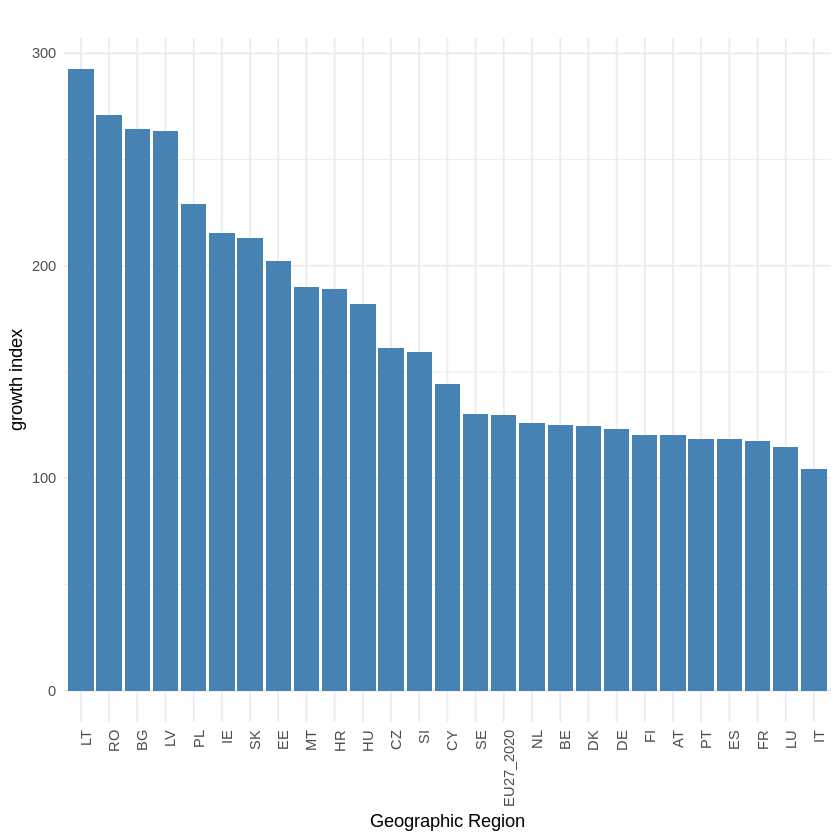

In [ ]:
ggplot(gdp_per_capita_ratio, aes(x = reorder(geo, -index), y = index)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "",
    x = "Geographic Region",
    y = "growth index"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### Analyze contributions to growth

**changing filters**

You can change the years and country filter, e.g.
country<-c("AT")
years<-c(2000)

country<-c("AT","SI")
years<-c(2023)

**Due to a possible large dataframe, please select one country and one year at a time!**

In [ ]:
country<-c("AT")
years<-c(2023)

**Contributors in data**

In [ ]:
data_1_filtered |>
  dplyr::filter(unitlabel == "Contribution to GDP growth, percentage point change on previous period") |>
    dplyr::select(na_itemlabel) |>
      distinct()

na_itemlabel
<chr>
"Value added, gross"
Gross domestic product at market prices
Taxes on products
Taxes less subsidies on products
Subsidies on products
Final consumption expenditure
Individual consumption expenditure of general government
Final consumption expenditure of households
Household and NPISH final consumption expenditure


In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel == "Contribution to GDP growth, percentage point change on previous period") |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(year %in% years) |>
  dplyr::select(geo, year, na_itemlabel, values) |>
  dplyr::rename("percentage" = "values",
                "contributor"= "na_itemlabel")

  df|>
    gt()|>
      gts()

geo,year,contributor,percentage
AT,2023,"Value added, gross",-1.06
AT,2023,Gross domestic product at market prices,-0.95
AT,2023,Taxes on products,0.02
AT,2023,Taxes less subsidies on products,0.10
AT,2023,Subsidies on products,0.08
AT,2023,Final consumption expenditure,0.00
AT,2023,Individual consumption expenditure of general government,0.06
AT,2023,Final consumption expenditure of households,-0.36
AT,2023,Household and NPISH final consumption expenditure,-0.24
AT,2023,Final consumption expenditure of NPISH,0.12


**with slice_max(percentage, n=5) we can control the best 5 contributors. You can change the n parameter. If you would like to see the top 5 bottom contributors, use slice_min(percentage, n=5))**

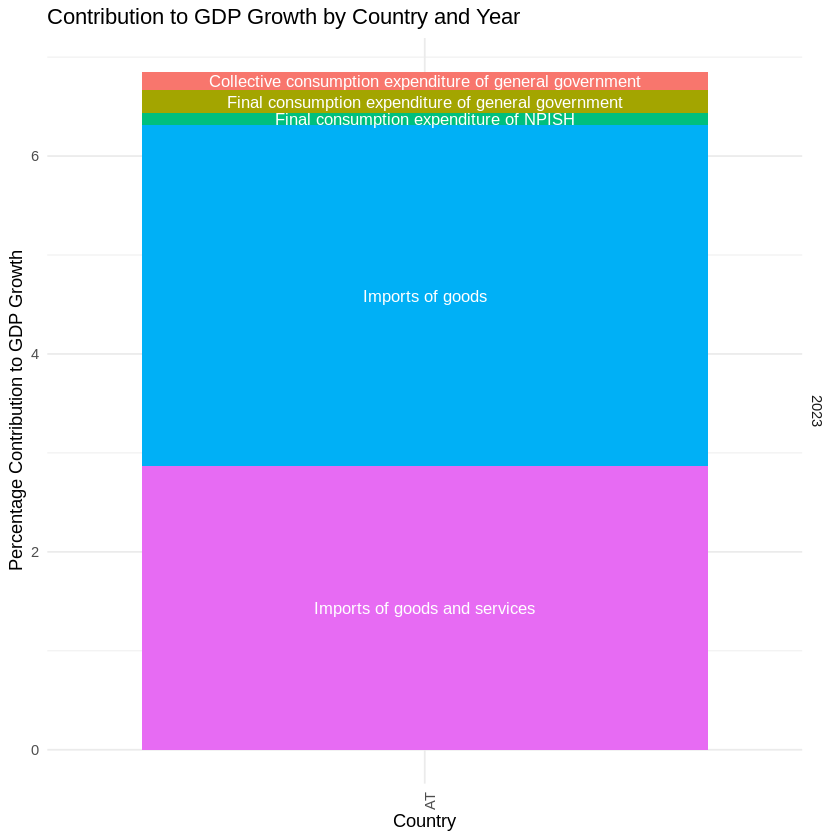

In [ ]:
df |>
  slice_max(percentage, n=5) |>
  ggplot() +
  aes(x = geo, y = percentage, fill = contributor) +
  geom_bar(stat = "identity") +  # Use stat="identity" to plot actual values
   geom_text(aes(label = contributor), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +  # Add labels for `na_itemlabel` inside the bars
  facet_grid(year ~ ., scales = "free", space = "free") +
  labs(
    title = "Contribution to GDP Growth by Country and Year",
    x = "Country",
    y = "Percentage Contribution to GDP Growth"
  ) +
  guides(fill = "none") +  # Remove the legend for the `fill` aesthetic
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate x-axis labels for readability


**You can also specify which contributors you want to show**

In [ ]:
contributors<-c("Final consumption expenditure of households",
                "Gross fixed capital formation",
                "Final consumption expenditure of general government",
                "Exports of goods and services",
                "Imports of goods and services")

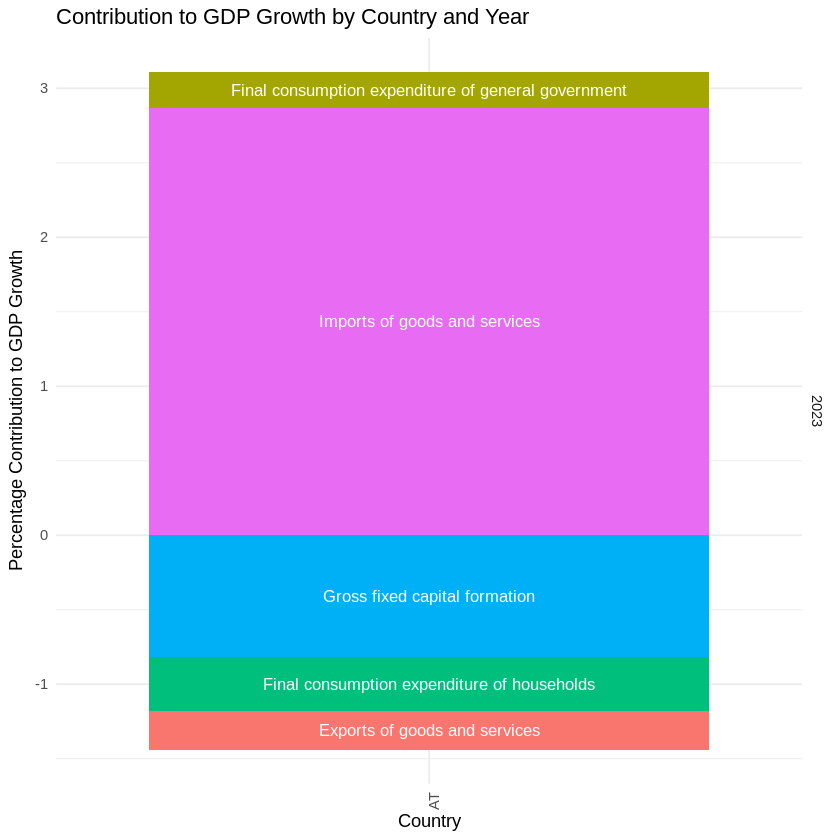

In [ ]:
df |>
  dplyr::filter(contributor %in% contributors) |>
  ggplot() +
  aes(x = geo, y = percentage, fill = contributor) +
  geom_bar(stat = "identity") +  # Use stat="identity" to plot actual values
   geom_text(aes(label = contributor), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +  # Add labels for `na_itemlabel` inside the bars
  facet_grid(year ~ ., scales = "free", space = "free") +
  labs(
    title = "Contribution to GDP Growth by Country and Year",
    x = "Country",
    y = "Percentage Contribution to GDP Growth"
  ) +
  guides(fill = "none") +  # Remove the legend for the `fill` aesthetic
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate x-axis labels for readability


**Lets see how import and export apply to gdp contribution**

In [ ]:
country<-c("AT")
years<-c(2023)
na_items<-c("Exports of goods and services", "Imports of goods and services")

In [ ]:
data_1_filtered |>
  dplyr::filter(unitlabel == "Contribution to GDP growth, percentage point change on previous period") |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(year %in% years) |>
  dplyr::filter(na_itemlabel %in% na_items) |>
  dplyr::select(geo, year, na_itemlabel, values) |>
  dplyr::rename("percentage" = "values",
                "contributor"= "na_itemlabel")|>
    gt()|>
      gts()

geo,year,contributor,percentage
AT,2023,Exports of goods and services,-0.26
AT,2023,Imports of goods and services,2.87


#### Nominal and real gdp

**All units in a database**

In [ ]:
data_1_filtered |>
  dplyr::select(unitlabel) |>
  distinct()

unitlabel
<chr>
"Chain linked volumes (2010), million euro"
"Chain linked volumes, index 2015=100"
"Chain linked volumes, percentage change on previous period"
"Contribution to GDP growth, percentage point change on previous period"
"Current prices, million euro"
Percentage of gross domestic product (GDP)
"Price index (implicit deflator), 2015=100, euro"


In [ ]:
units<-c("Chain linked volumes (2010), million euro","Current prices, million euro")
country<-c("AT")
na_itemlabels<-"Gross domestic product at market prices"

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(na_itemlabel %in% na_itemlabels)|>
  dplyr::select(geo, unitlabel, year, values) |>
  pivot_wider(names_from=unitlabel, values_from = values)|>
  rename("realGDP (milions EUR)"="Chain linked volumes (2010), million euro",
         "nominalGDP (milions EUR)"="Current prices, million euro")

  df|>
    gt()|>
      gts()

geo,year,realGDP (milions EUR),nominalGDP (milions EUR)
AT,1995,218207.5,183629.2
AT,1996,223042.5,185944.9
AT,1997,227828.6,186913.0
AT,1998,235786.4,193947.0
AT,1999,244656.5,203064.9
AT,2000,252459.9,212406.8
AT,2001,255784.7,219373.3
AT,2002,259581.5,225087.9
AT,2003,262544.8,230541.9
AT,2004,269279.8,240541.7


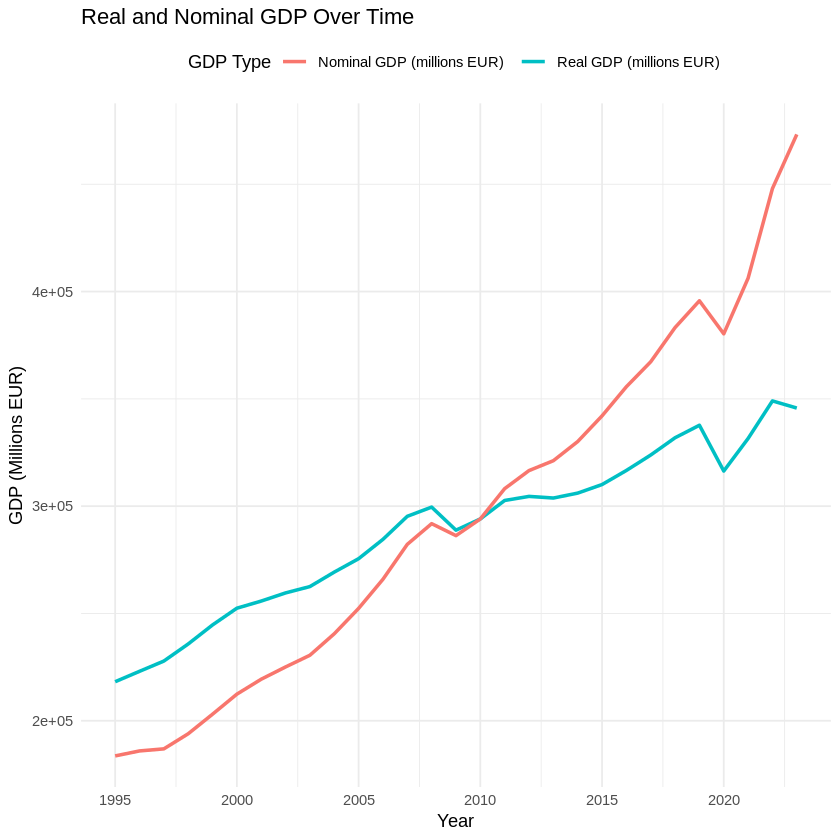

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

df |>
  ggplot(aes(x = year)) +
  geom_line(aes(y = `realGDP (milions EUR)`, color = "Real GDP (millions EUR)"), linewidth = 1) +
  geom_line(aes(y = `nominalGDP (milions EUR)`, color = "Nominal GDP (millions EUR)"), linewidth = 1) +
  labs(
    title = "Real and Nominal GDP Over Time",
    x = "Year",
    y = "GDP (Millions EUR)",
    color = "GDP Type"
  ) +
  theme_minimal() +
  theme(legend.position = "top")


**Task**

Now you can analyze the data on your own. You can change year, country, units and na_item.